## Uso de data science para entender como obtener buen sabor en vinos.
##### Using Data Science to Understand The Knowhow Make Wine Taste Good

### Importamos librerias
##### First, import some necessary libraries. 

In [104]:
import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for displaying DataFrames

# Importamos el archivo visuals.py desde nuestra carpeta raiz
# Import code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [16]:
# Cargamos el dataset de vinos rojos / Load the Red Wines dataset
redwines = pd.read_csv("data/winequality-red.csv", sep=';')

# Mostramos resultados del dataset / Display the first five records
display(redwines.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Nos aseguramos de no tener valores faltantes dentro del dataset
##### We'll begin by first seeing if our data has any missing information

In [17]:
redwines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Ecaminamos las columnas y los tipos de datos dentro del dataset
##### Examine the features in the data-set and their data types

In [18]:
redwines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
columnas_unicas = redwines.columns.tolist()
columnas_unicas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

#### De la columna *quality* representa una escala de calidad de los vinos evaluados. En este analisis nos vamos a enfocar en todos los vinos y agrupar los mismos en diferentes grupos que seran. 
#### 7+ los de excelencia , 6+ de gran calidad, 5/6 de calidad promedio y por debajo de 5 los insipidos.

In [20]:
quant_wines = redwines.shape[0]

# Cantidad de vinos por arriba de 6 / Number of wines with quality rating above 6
quality_above_6 = redwines.loc[(redwines['quality'] > 6)]
quant_wines_above_6 = quality_above_6.shape[0]

# Cantidad de vinos por debajo de 5 / Number of wines with quality rating below 5
quality_below_5 = redwines.loc[(redwines['quality'] < 5)]
quant_wines_below_5 = quality_below_5.shape[0]

# Cantidad de vinos entre calidad 5 y 6 / Number of wines with quality rating between 5 to 6
quality_between_5 = redwines.loc[(redwines['quality']) >= 5 & (redwines['quality'] <= 6)]
quant_wines_between_5 = quality_between_5.shape[0]

# Porcentaje de vinos por arriba de calidad 6 / Percentage of wines with quality rating above 6
greater_percent = quant_wines_above_6*100/quant_wines


# Imprimimos resultados / Print the results
print(f"Total number of wine data: {quant_wines}")
print(f"Wines with rating 7 and above: {quant_wines_above_6}")
print(f"Wines with rating less than 5: {quant_wines_below_5}")
print(f"Wines with rating 5 and 6: {quant_wines_between_5}")
print(f"Percentage of wines with quality 7 and above: {greater_percent:.2f}%")


# Imprimimos datos estadisticos del dataset completo / Some more additional data analysis

display(np.round(redwines.describe()))

Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1599
Percentage of wines with quality 7 and above: 13.57%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


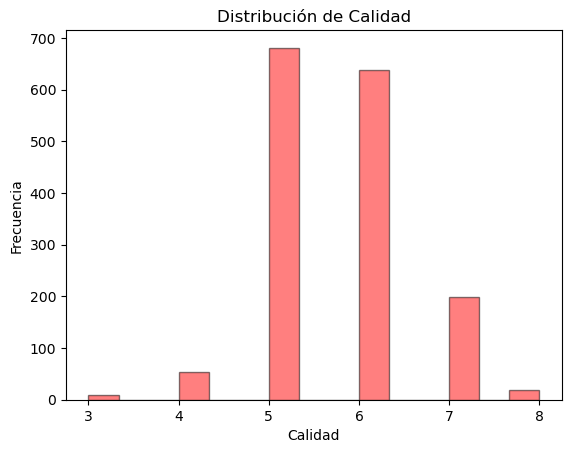

In [21]:
# Todos las muestras / all samples 
allwines_ranking = redwines['quality']

# Crea un histograma para visualizar la distribución de 'quality_data'
plt.hist(allwines_ranking, bins=15, edgecolor='k', alpha=0.5, color='red')

# Etiquetas y título
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calidad')

# Muestra el gráfico
plt.show()

## Como observamos en el grafico de barras tenemos un porcentaje alto de muestras dentro del dataset en la calidades que estan entre 5 y 6, algunos resultados por arriba de 6 y muy pocos por arriba de 7 y la vez pocas muestras tambien por debajo de 5. 

As we can see, most fines fall under **average quality (between 5 and 6)**. Wines which were rated high are in the lower hundreds, whereas there are very few wines that aren't tasty enough (low ratings).

Next, since our aim is to predict the quality of wines, we’ll now extract the last column and store it separately.

# Encontrando relaciones entre las caracteristicas/cualidades entre los vinos
##### Exploring Relationships between features

#### Gráfico de densidad kernel // Kernel Density Estimation Graph 

Vamos a graficar nuestros datos utilizando Kernel Density Estimation Este enfoque es útil para identificar la forma de las distribuciones y detectar si hay indicios de múltiples modas en las distribuciones de las variables, lo que es útil en análisis exploratorios de datos.

Pueden hacerle zoom al grafico que esta abara en la celda de abajo, tendra por orden todas las columnas de nuestro dataset:

'fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol',
'quality'

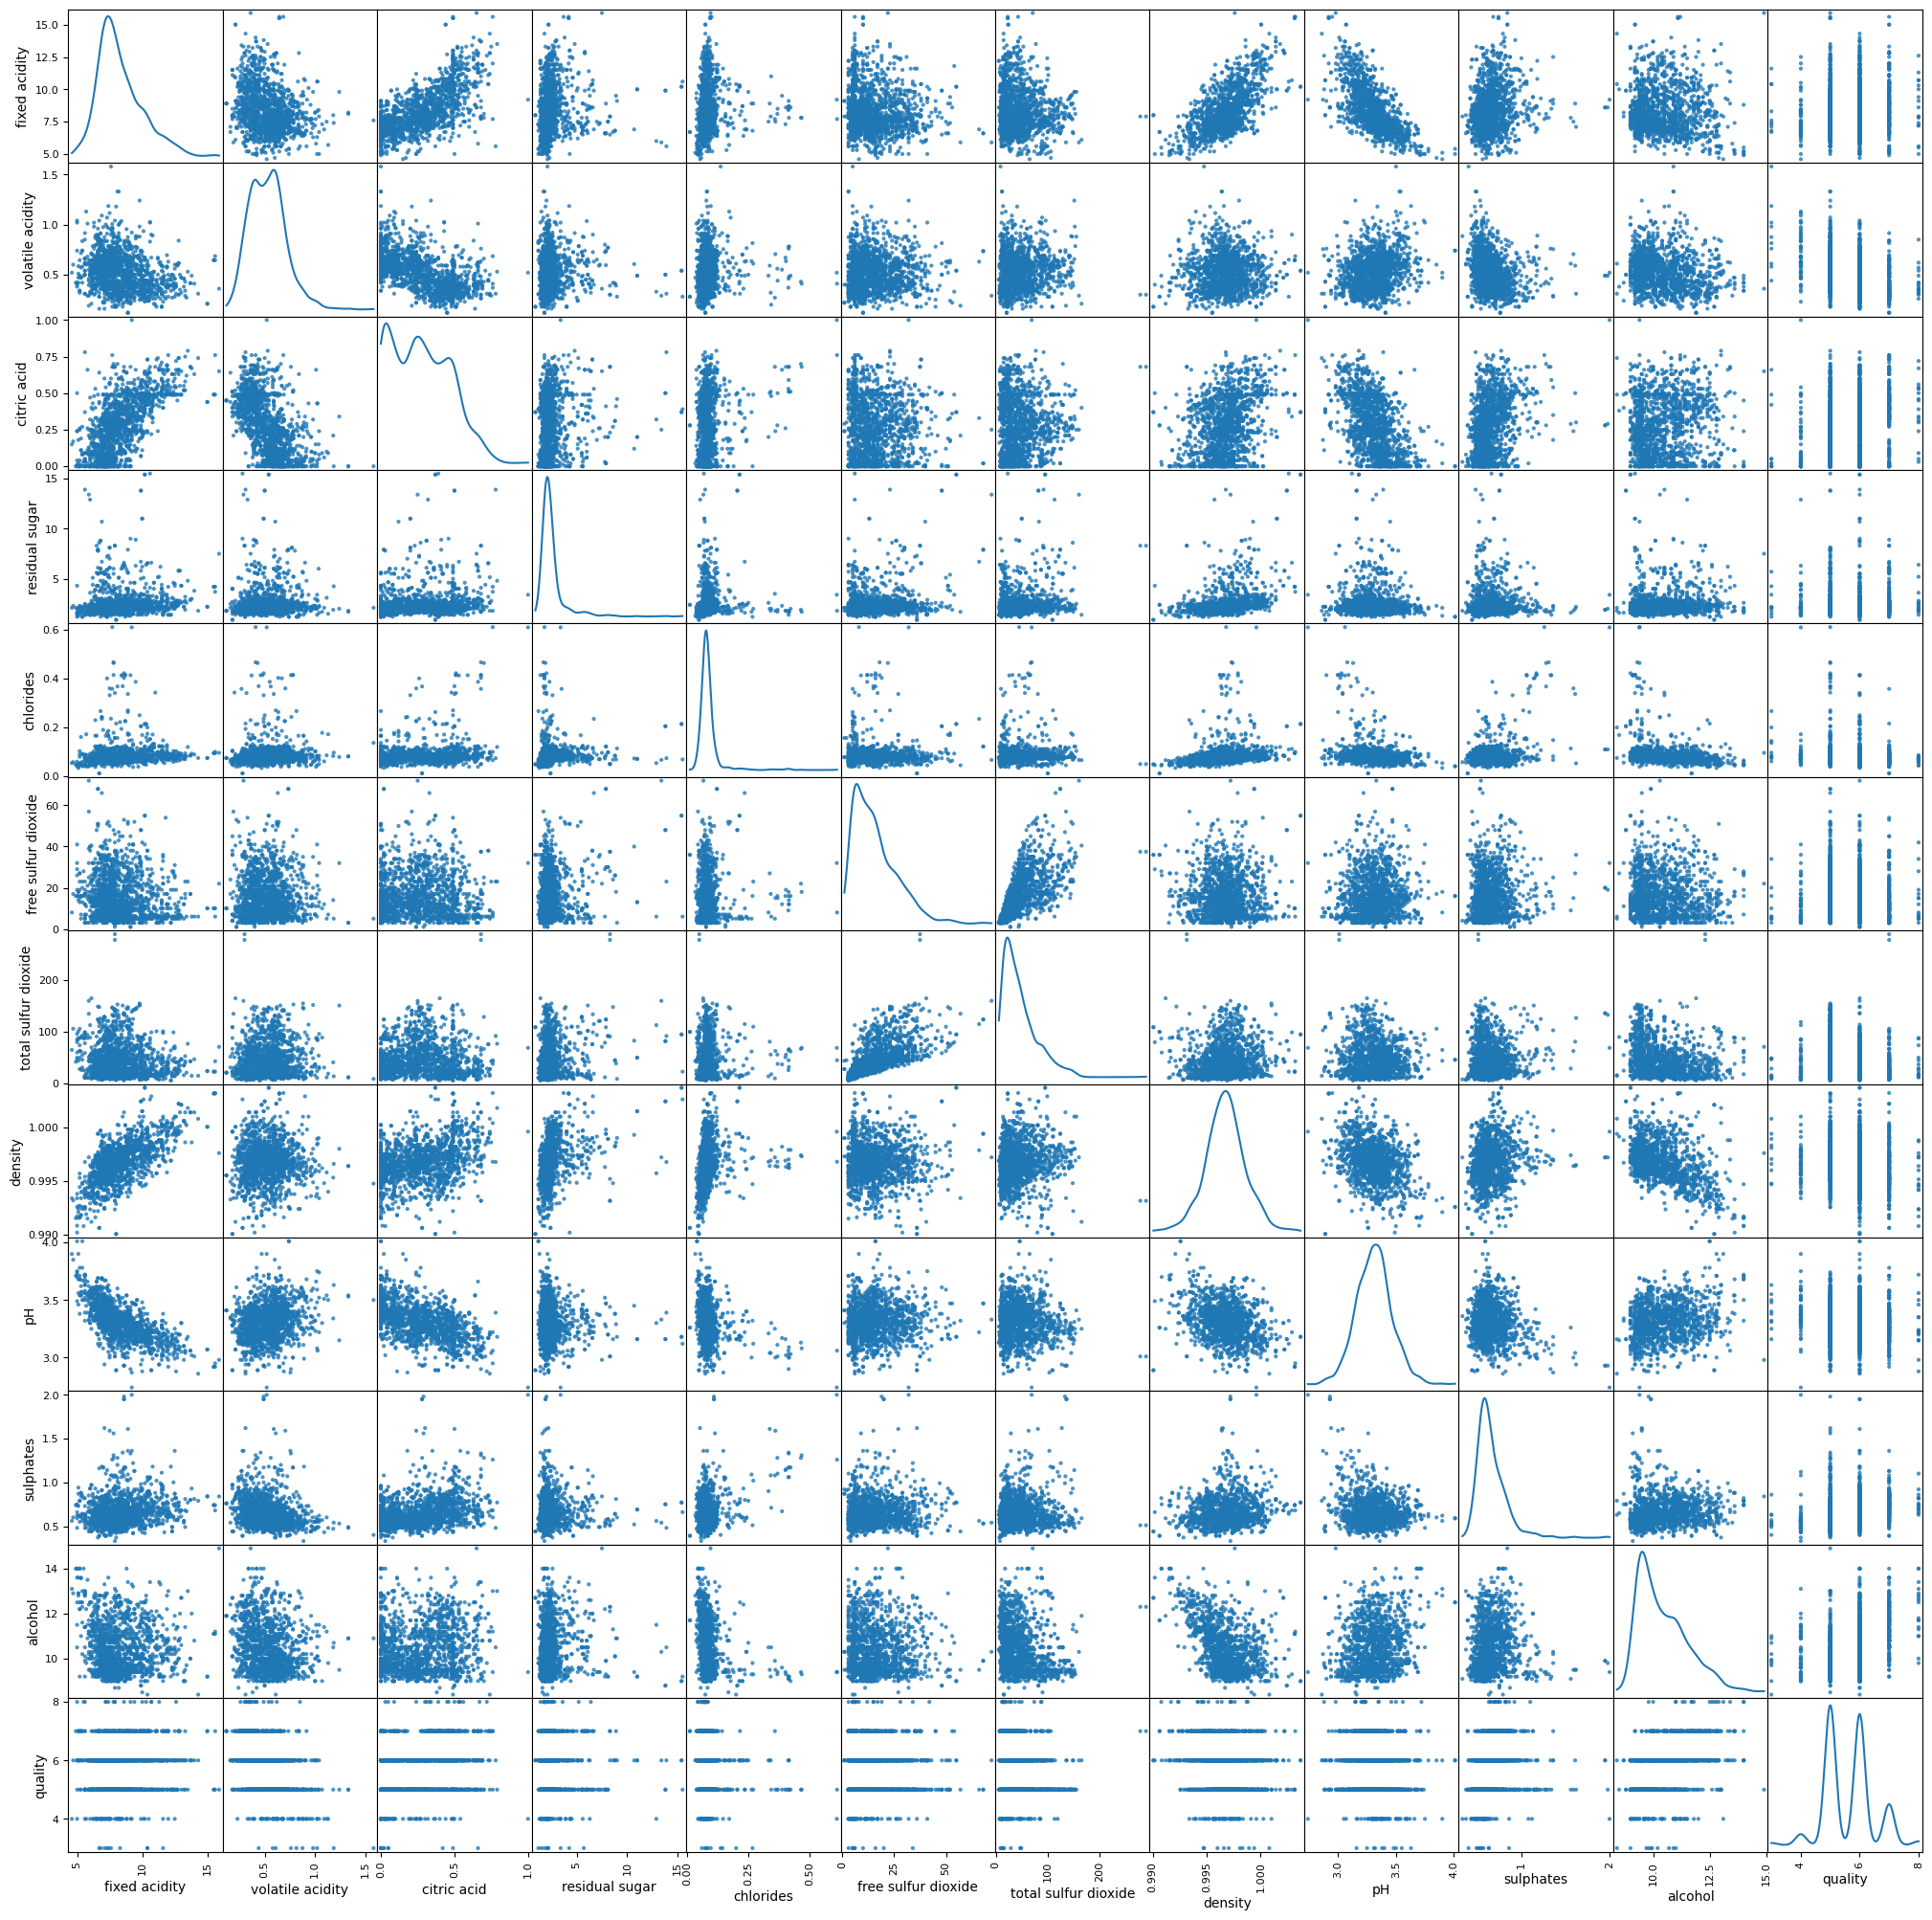

In [22]:
pd.plotting.scatter_matrix(redwines, alpha = 0.8, figsize = (25,25), diagonal = 'kde');

#### Mapa de calor // Heatmap Graph 

Los mapas de calor de correlación son una herramienta valiosa en el análisis de datos, especialmente en la exploración de conjuntos de datos grandes y complejos. Estas visualizaciones proporcionan una representación gráfica de las relaciones entre las variables, lo que facilita la identificación de patrones, asociaciones y tendencias dentro de los datos.

In [1]:
correlacion = redwines.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlacion, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

NameError: name 'redwines' is not defined

#### Como puedes observar, los cuadrados con valores positivos muestran correlaciones directas entre las características. Cuanto más altos sean los valores, más fuertes serán estas relaciones, y serán más rojizos. Esto significa que si una característica aumenta, la otra tiende a aumentar también, y viceversa.

#### Los cuadrados con valores negativos muestran una correlación inversa. Cuanto mayor sean estos valores, más inversamente proporcionales serán, y serán más azules. Esto significa que si el valor de una característica es más alto, el valor de la otra disminuye.


As you can see, the squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are — they’ll be more reddish. That means, if one feature increases, the other one also tends to increase, and vice-versa.

The squares that have negative values show an inverse co-relationship. The more negative these values get, the more inversely proportional they are, and they’ll be more blue. This means that if the value of one feature is higher, the value of the other one gets lower.

Finally, squares close to zero indicate almost no co-dependency between those sets of features.

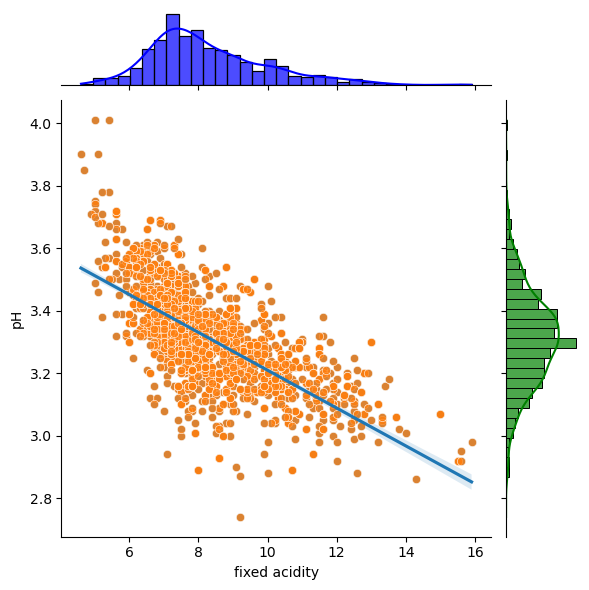

In [24]:
# Creamos un nuevo DataFrame que contiene solo las columnas pH y fixed acidity
#Create a new DF containing only pH and fixed acidity columns to visualize their co-relations

fixedAcidity_pH = redwines[['pH', 'fixed acidity']]

# Inicializamos un JointGrid con el DataFrame y las columnas especificadas
#Initialize a joint-grid with the dataframe, using seaborn library

gridA = sns.JointGrid(data=fixedAcidity_pH, x="fixed acidity", y="pH", height=6)


# Dibujamos un gráfico de dispersión (scatter plot) en la grilla con la línea de regresión
sns.scatterplot(data=fixedAcidity_pH, x="fixed acidity", y="pH", alpha=0.8, ax=gridA.ax_joint)
sns.regplot(data=fixedAcidity_pH, x="fixed acidity", y="pH", scatter=False, ax=gridA.ax_joint)


# Dibujamos un gráfico de dispersión (scatter plot)
sns.scatterplot(data=fixedAcidity_pH, x="fixed acidity", y="pH", alpha=0.8, ax=gridA.ax_joint)


# Dibujamos las distribuciones marginales por separado
sns.histplot(data=fixedAcidity_pH, x="fixed acidity", color="b", alpha=0.7, ax=gridA.ax_marg_x, kde=True)
sns.histplot(data=fixedAcidity_pH, y="pH", color="g", alpha=0.7, ax=gridA.ax_marg_y, kde=True)

plt.show()


##### Podemos observar que a medida que aumentan los niveles de acidez fija, los niveles de pH disminuyen. Un nivel de pH más bajo es un indicador de una alta acidez.

This scatter-plot shows how the values of pH change with changing fixed acidity levels. We can see that, as fixed acidity levels increase, the pH levels drop. A lower pH level is, after all, an indicator of high acidity.


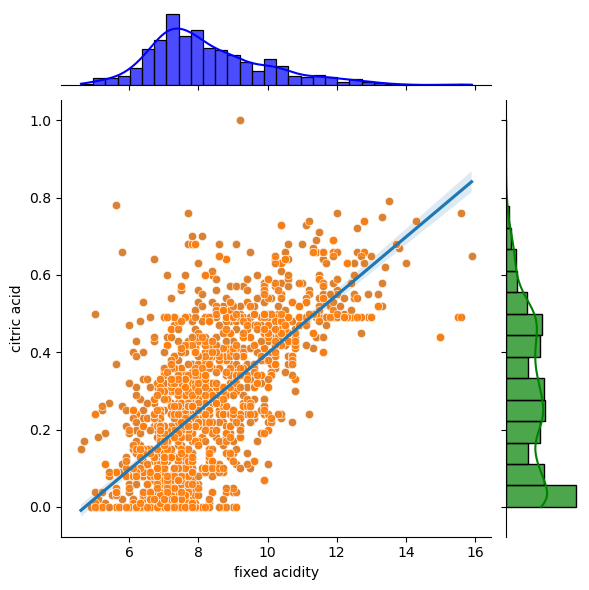

In [26]:
# Creamos un nuevo DataFrame que contiene solo las columnas citric acid y fixed acidity
fixedAcidity_citricAcid = redwines[['citric acid', 'fixed acidity']]

# Inicializamos un JointGrid con el DataFrame y las columnas especificadas
gridA2 = sns.JointGrid(data=fixedAcidity_citricAcid, x="fixed acidity", y="citric acid", height=6)

# Dibujamos un gráfico de dispersión (scatter plot) en la grilla con la línea de regresión
sns.scatterplot(data=fixedAcidity_citricAcid, x="fixed acidity", y="citric acid", alpha=0.8, ax=gridA2.ax_joint)
sns.regplot(data=fixedAcidity_citricAcid, x="fixed acidity", y="citric acid", scatter=False, ax=gridA2.ax_joint)


# Dibujamos un gráfico de dispersión (scatter plot) en la grilla
sns.scatterplot(data=fixedAcidity_citricAcid, x="fixed acidity", y="citric acid", alpha=0.8, ax=gridA2.ax_joint)

# Dibujamos las distribuciones marginales utilizando sns.histplot
sns.histplot(data=fixedAcidity_citricAcid, x="fixed acidity", ax=gridA2.ax_marg_x, color="b", alpha=0.7, kde=True)
sns.histplot(data=fixedAcidity_citricAcid, y="citric acid", ax=gridA2.ax_marg_y, color="g", alpha=0.7, kde=True)


plt.show()


##### A medida que aumenta la cantidad de ácidos cítricos, también observamos un incremento en los niveles de acidez fija. Este aumento en la acidez fija conlleva una disminución en los valores de pH. Esto se relaciona directamente con la tendencia general de que a medida que la acidez fija se vuelve más pronunciada, el pH tiende a reducirse. Este fenómeno tiene sentido ya que un pH más bajo es un indicador de una mayor acidez en el vino.


As the amount of citric acids increases, we also notice a rise in fixed acidity levels. This increase in fixed acidity results in a decrease in pH values. This is directly related to the general trend that as fixed acidity becomes more pronounced, the pH tends to decrease. This phenomenon makes sense since a lower pH is an indicator of higher acidity in the wine.

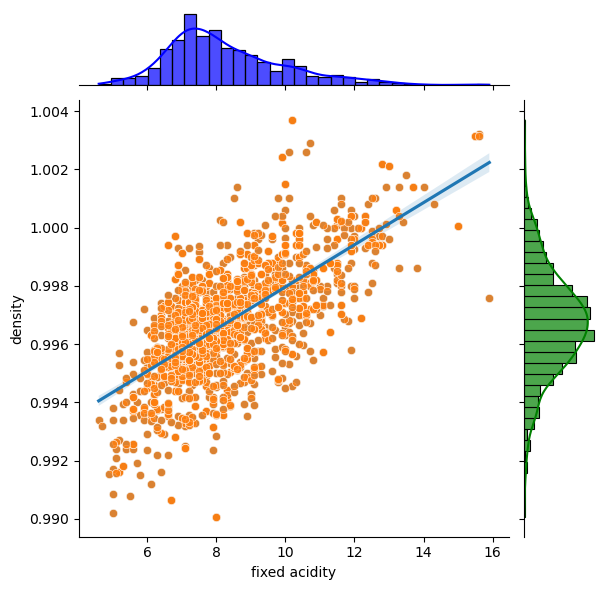

In [27]:
# Creamos un nuevo DataFrame que contiene solo las columnas citric acid y fixed acidity
fixedAcidity_density = redwines[['density', 'fixed acidity']]

# Inicializamos un JointGrid con el DataFrame y las columnas especificadas
gridA3 = sns.JointGrid(data=fixedAcidity_density, x="fixed acidity", y="density", height=6)

# Dibujamos un gráfico de dispersión (scatter plot) en la grilla con la línea de regresión
sns.scatterplot(data=fixedAcidity_density, x="fixed acidity", y="density", alpha=0.8, ax=gridA3.ax_joint)
sns.regplot(data=fixedAcidity_density, x="fixed acidity", y="density", scatter=False, ax=gridA3.ax_joint)


# Dibujamos un gráfico de dispersión (scatter plot) en la grilla
sns.scatterplot(data=fixedAcidity_density, x="fixed acidity", y="density", alpha=0.8, ax=gridA3.ax_joint)

# Dibujamos las distribuciones marginales utilizando sns.histplot
sns.histplot(data=fixedAcidity_density, x="fixed acidity", ax=gridA3.ax_marg_x, color="b", alpha=0.7, kde=True)
sns.histplot(data=fixedAcidity_density, y="density", ax=gridA3.ax_marg_y, color="g", alpha=0.7, kde=True)


plt.show()



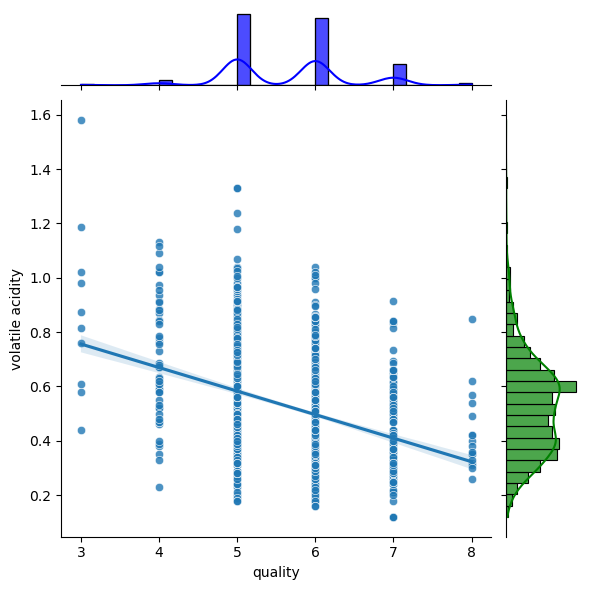

In [28]:
# Creamos un nuevo DataFrame que contiene solo las columnas quality y volatile acidity
quality_volatileAcidity = redwines[['quality', 'volatile acidity']]

# Inicializamos un JointGrid con el DataFrame y las columnas especificadas
gridA4 = sns.JointGrid(data=quality_volatileAcidity, x="quality", y="volatile acidity", height=6)

# Dibujamos un gráfico de dispersión (scatter plot) en la grilla con la línea de regresión
sns.scatterplot(data=quality_volatileAcidity, x="quality", y="volatile acidity", alpha=0.8, ax=gridA4.ax_joint)
sns.regplot(data=quality_volatileAcidity, x="quality", y="volatile acidity", scatter=False, ax=gridA4.ax_joint)

# Dibujamos las distribuciones marginales utilizando sns.histplot
sns.histplot(data=quality_volatileAcidity, x="quality", ax=gridA4.ax_marg_x, color="b", alpha=0.7, kde=True)
sns.histplot(data=quality_volatileAcidity, y="volatile acidity", ax=gridA4.ax_marg_y, color="g", alpha=0.7, kde=True)

plt.show()

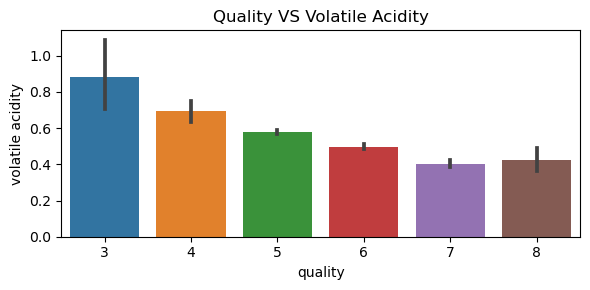

<Figure size 640x480 with 0 Axes>

In [29]:
# Podemos visualizar las relaciones de valores discretos con grafico de barras
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1, figsize=(6, 3))  # Aumentamos el ancho de la figura
sns.barplot(x='quality', y='volatile acidity', data=quality_volatileAcidity, ax=axs)
plt.title('Quality VS Volatile Acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()


#### Por lo general, una mayor calidad suele asociarse con niveles bajos de acidez volátil. Esto tiene sentido, ya que la acidez volátil es un indicador de deterioro y podría dar lugar a aromas desagradables.


Higher quality is typically linked to lower levels of volatile acidity. This is logical, as volatile acidity is an indicator of spoilage and can result in unpleasant aromas



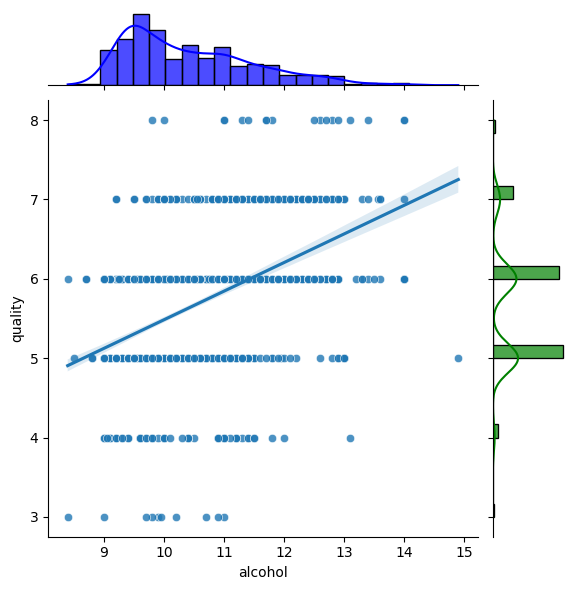

In [31]:
# Creamos un nuevo DataFrame que contiene solo las columnas alcohol y quality
alcohol_quality = redwines[['alcohol', 'quality']]

# Inicializamos un JointGrid con el DataFrame y las columnas especificadas
gridA5 = sns.JointGrid(data=alcohol_quality, x="alcohol", y="quality", height=6)

# Dibujamos un gráfico de dispersión (scatter plot) en la grilla con la línea de regresión
sns.scatterplot(data=alcohol_quality, x="alcohol", y="quality", alpha=0.8, ax=gridA5.ax_joint)
sns.regplot(data=alcohol_quality, x="alcohol", y="quality", scatter=False, ax=gridA5.ax_joint)

# Dibujamos las distribuciones marginales utilizando sns.histplot
sns.histplot(data=alcohol_quality, x="alcohol", ax=gridA5.ax_marg_x, color="b", alpha=0.7, kde=True)
sns.histplot(data=alcohol_quality, y="quality", ax=gridA5.ax_marg_y, color="g", alpha=0.7, kde=True)

plt.show()


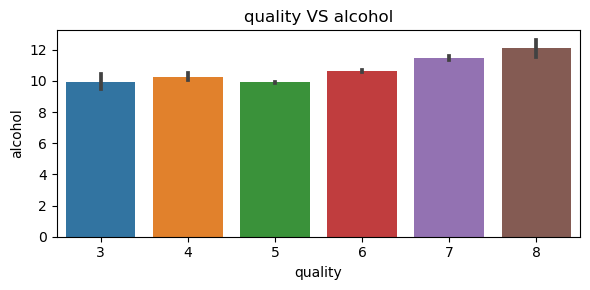

<Figure size 640x480 with 0 Axes>

In [32]:
fig, axs = plt.subplots(ncols=1,figsize=(6,3))
sns.barplot(x='quality', y='alcohol', data=alcohol_quality, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()



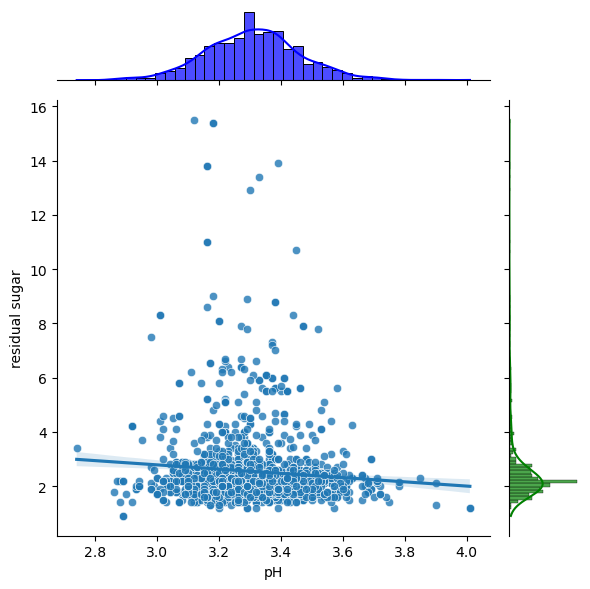

<Figure size 640x480 with 0 Axes>

In [34]:
# Remplazando las variables A y B por la columnas deseadas se pueden ver graficos de las relaciones entre si 
#Select any two features of your choice and view their relationship


# Definimos las características (features)
featureA = 'pH'
featureB = 'residual sugar'

# Creamos un DataFrame con las características seleccionadas
featureA_featureB = redwines[[featureA, featureB]]

# Inicializamos un JointGrid con el DataFrame y las características seleccionadas
g = sns.JointGrid(x=featureA, y=featureB, data=featureA_featureB, height=6)

# Dibujamos un gráfico de dispersión (scatter plot) en la grilla con la línea de regresión
sns.scatterplot(data=featureA_featureB, x=featureA, y=featureB, alpha=0.8, ax=g.ax_joint)
sns.regplot(data=featureA_featureB, x=featureA, y=featureB, scatter=False, ax=g.ax_joint)

# Dibujamos las distribuciones marginales utilizando sns.histplot
sns.histplot(data=featureA_featureB, x=featureA, ax=g.ax_marg_x, color="b", alpha=0.7, kde=True)
sns.histplot(data=featureA_featureB, y=featureB, ax=g.ax_marg_y, color="g", alpha=0.7, kde=True)


plt.tight_layout()
plt.show()
plt.gcf().clear()


### Detectando valores atípicos
#### Detectar valores atípicos en nuestros analisis es crucial para llegar correctamente a la etapa de preproceso. 
##### La presencia de valores atípicos a veces pueden generar sesgos en los datos que comprometen.

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. We will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.


### Asigna el valor del percentil 25 para la característica dada a Q1. Utilizamos np.percentile para esto.
### Asigna el valor del percentil 75 para la característica dada a Q3. Nuevamente, usamos np.percentile.
Calcula el paso para identificar valores atípicos en la característica dada y asígnalo a cada paso o "step".

#### Se calcula el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1: IQR = Q3 - Q1.

Opcionalmente, elimina puntos de datos del conjunto añadiendo sus índices a la lista de valores atípicos.

NOTA: Si decides eliminar valores atípicos, asegúrate de que los datos de muestra no contengan ninguno de estos puntos. Una vez que hayas realizado esta implementación, el conjunto de datos se almacenará en la variable "correct_Data".


    Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
    Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
    Assign the calculation of an outlier step for the given feature to step.
    Optionally remove data points from the dataset by adding indices to the outliers list.

NOTE: If you choose to remove any outliers, ensure that the sample data does not contain any of these points! Once you have performed this implementation, the dataset will be stored in the variable good_data.


In [35]:
# Por cada caracteristica buscamos ambos valores extremos
# For each feature find the data points with extreme high or low values

for feature in redwines.keys():
    
    # Asignamos el valor del percentil 25 para la característica dada a Q1
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(redwines[feature], q=25)
    
    # Asignamos el valor del percentil 75 para la característica dada a Q3
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(redwines[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    
 # Se establece un "umbral" para identificar valores atípicos. 
 # En este caso, el umbral se calcula como 1.5 veces el IQR: step = 1.5 * IQR.   
    
    
    # Display the outliers
    print(f"Data points considered outliers for the feature '{feature}':")
    display(redwines[~((redwines[feature] >= Q1 - step) & (redwines[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Eliminamos los outliers y guardamos una variable sin ellos
# Remove the outliers, if any were specified
Correct_data = redwines.drop(redwines.index[outliers]).reset_index(drop = True)


# "~" se usa para seleccionar las filas del DataFrame data que no cumplen con la condición dada dentro del paréntesis. 

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
1558,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
294,13.3,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
354,6.1,0.210,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.900000,6
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
544,14.3,0.310,0.74,1.80,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


In [36]:
Correct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
redwines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
outliers = []

for feature in redwines.keys():
    Q1 = np.percentile(redwines[feature], q=25)
    Q3 = np.percentile(redwines[feature], q=75)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    feature_outliers = redwines[~((redwines[feature] >= Q1 - step) & (redwines[feature] <= Q3 + step))]
    
    # Obtener los índices de los valores atípicos para esta característica y agregarlos a la lista
    feature_outlier_indices = feature_outliers.index.tolist()
    outliers.extend(feature_outlier_indices)

# Eliminar duplicados (si los hay) en la lista de valores atípicos
outliers = list(set(outliers))
print(f"Valores outliers: {len(outliers)}")


Valores outliers: 420


In [39]:
Correct_data = redwines.drop(redwines.index[outliers]).reset_index(drop = True)

In [40]:
Correct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 110.7 KB


## ML para predecir la calidad del vino
##### Using Machine Learning to Predict the Quality of Wines

### Primero, aplicaremos algunas transformaciones para convertir nuestro problema de regresión en un problema de clasificación. Luego, utilizaremos nuestros datos para crear un conjunto de características y etiquetas de destino.

In [41]:
#Los vinos con una puntuación de calidad entre 1 y 4 se considerarán de baja calidad, 
#entre 5 y 6 se considerarán de calidad promedio
#entre 7 y 10 se considerarán de alta calidad.

#Defining the splits for categories. 1-4 will be poor quality, 5-6 will be average, 7-10 will be great

bins = [1,4,6,10]

# Etiqueta de calidad: Se crea una lista de etiquetas de calidad,
# donde se asigna el valor 0 para vinos de baja calidad, 1 para vinos de calidad promedio
# 2 para vinos de alta calidad.
#0 for low quality, 1 for average, 2 for great quality

quality_labels=[0,1,2]
Correct_data['quality_categorical'] = pd.cut(Correct_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)

#Displays the first 2 columns
display(Correct_data.head(n=2))

# Dividimos la data segun sus caracteristicas y etiquetas
# Split the data into features and target label

#almacena las etiquetas de calidad 
quality_raw = Correct_data['quality_categorical']

# almacena las características del vino, eliminando ambas columnas (quality y quality_categorical)
features_raw = Correct_data.drop(['quality', 'quality_categorical'], axis = 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


# Mezclamos nuestra información para empezar con las pruebas
###### Next, shuffle and split our data-set into training and testing subsets:

In [42]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


#test_size = 0.2 (20%) se refiere a la proporción del conjunto de datos que se utilizará como conjunto de prueba.

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 943 samples.
Testing set has 236 samples.


#### Importamos fbeta_score y accuracy_score de sklearn.metrics.
Entrenamos al modelo con los datos de entrenamiento muestreados y registramos el tiempo de entrenamiento.
Realizamos predicciones en los datos de prueba X_test, así como en los primeros 300 puntos de entrenamiento X_train[:300].
Registramos el tiempo total de predicción.
Calculamos la puntuación de precisión (accuracy score) tanto para el subconjunto de entrenamiento como para el conjunto de pruebas.
Calculamos el valor F (F-score) tanto para el subconjunto de entrenamiento como para el conjunto de pruebas.
Debemos asegurarnos de establecer el parámetro beta en el cálculo del valor F


    Import fbeta_score and accuracy_score from sklearn.metrics.
    Fit the learner to the sampled training data and record the training time.
    Perform predictions on the test data X_test, and also on the first 300 training points X_train[:300].
        Record the total prediction time.
    Calculate the accuracy score for both the training subset and testing set.
    Calculate the F-score for both the training subset and testing set.
        Make sure that you set the beta parameter!


### Luego de elegir nuestro algoritmo, creamos la funcion para entrenar nuestro set de datos 
##### Next, we will write a function that will accept a ML algorithm of our choice, and use our data to train it

### Primero expondre los pasos en celdas comentadas, las separaré en :
##### Importacion de modulos de sklearn, crear la funcion completa para entrenar los modelos
###### Funcion para registrar y calcular tiempos de entrenamiento y prueba
## Al final estara el codigo completo, evaluen pero a la vez ignoren la siguiente parte

In [43]:
# Importacion de metricas desde sklearn
# Import two classification metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score


# Creamos nuestra funcion :

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: quality training set
       - X_test: features testing set
       - y_test: quality testing set
    '''
   
    results = {}

In [49]:
# Importar los módulos necesarios
from sklearn.svm import SVC

# Crear un modelo SVM
learner1 = SVC(random_state=42)

# Tamaño de muestra
sample_size = 250

# Llamar a la función para entrenar y evaluar el modelo SVM
results_svm = train_predict_evaluate(learner1, sample_size, X_train, y_train, X_test, y_test)


SVC entrenado en 250 muestras.


In [50]:
# Importar los módulos necesarios
from sklearn.ensemble import RandomForestClassifier
# Crear un modelo de clasificador de bosque aleatorio
learner2 = RandomForestClassifier(random_state=42)

# Tamaño de muestra
sample_size = 250

# Llamar a la función para entrenar y evaluar el modelo 2 (Clasificador de Bosque Aleatorio)
results2 = train_predict_evaluate(learner2, sample_size, X_train, y_train, X_test, y_test)

RandomForestClassifier entrenado en 250 muestras.


In [51]:
# Importar los módulos necesarios
from sklearn.tree import DecisionTreeClassifier

learner3 = DecisionTreeClassifier()
sample_size = 250
results_decision_tree = train_predict_evaluate(learner3, sample_size, X_train, y_train, X_test, y_test)


DecisionTreeClassifier entrenado en 250 muestras.


### Registra el tiempo de inicio y finalización de las predicciones para calcular el tiempo total de predicción.
"""
Fit/train the learner to the training data using slicing with 'sample_size'
using .fit(training_features[:], training_labels[:])
"""
start = time() # Get start time of training
learner = learner.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
end = time() # Get end time of training

##### Calculate the training time
results['train_time'] = end - start

### la función realiza predicciones tanto en un subconjunto de los datos de entrenamiento (los primeros 250 puntos) 
    
"""
Get the predictions on the first 250 training samples(X_train), 
and also predictions on the test set(X_test) using .predict()
"""
start = time() # Get start time
predictions_train = learner.predict(X_train[:300])
predictions_test = learner.predict(X_test)
    
end = time() # Get end time

   # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F1-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results


### Dado el desgloce anterior, Creamos la celda con la funcion + registros + conjunto de datos + ejemplos de modelos y por ultimo la visualizacion de los resultados. 

In [66]:
# Creamos la función train_predict_evaluate
def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    
    # Registro del tiempo de entrenamiento
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])  # Entrenamiento del modelo
    end = time()
    results['train_time'] = end - start  # Cálculo del tiempo de entrenamiento
    
    # Registro del tiempo de predicción
    start = time()
    predictions_train = learner.predict(X_train[:300])  # Predicciones en el conjunto de entrenamiento
    predictions_test = learner.predict(X_test)  # Predicciones en el conjunto de prueba
    end = time()
    results['pred_time'] = end - start  # Cálculo del tiempo de predicción
    
    # Cálculo de la precisión en el subconjunto de entrenamiento y en el conjunto de prueba
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Cálculo del puntaje F1 en el subconjunto de entrenamiento y en el conjunto de prueba
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
    
    # Éxito
    print(f"{learner.__class__.__name__} entrenado en {sample_size} muestras.")
    
    # Devolver los resultados
    return results

# Crear un conjunto de datos de ejemplo y dividirlo en entrenamiento y prueba
X, y = features_raw, quality_raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Ejemplo 1: Máquinas de Vectores de Soporte (SVM)
learner1 = SVC()
sample_size = 300
results_svm = train_predict_evaluate(learner1, sample_size, X_train, y_train, X_test, y_test)


# Ejemplo 2: Clasificador de bosque aleatorio
learner2 = RandomForestClassifier(random_state=42)
sample_size = 300
results2 = train_predict_evaluate(learner2, sample_size, X_train, y_train, X_test, y_test)


# Ejemplo 3: Árbol de Decisión
learner3 = DecisionTreeClassifier()
sample_size = 300
results_dt = train_predict_evaluate(learner3, sample_size, X_train, y_train, X_test, y_test)


# Visualizar los resultados
print("\nResultados de Máquinas de Vectores de Soporte (SVM):")
print(results_svm)

print("\nResultados de  Clasificador de bosque aleatorio:")
print(results2)

print("\nResultados de Árbol de Decisión:")
print(results_dt)


SVC entrenado en 300 muestras.
RandomForestClassifier entrenado en 300 muestras.
DecisionTreeClassifier entrenado en 300 muestras.

Resultados de Máquinas de Vectores de Soporte (SVM):
{'train_time': 0.009224891662597656, 'pred_time': 0.019430875778198242, 'acc_train': 0.8866666666666667, 'acc_test': 0.8440677966101695, 'f_train': 0.8866666666666667, 'f_test': 0.8440677966101695}

Resultados de  Clasificador de bosque aleatorio:
{'train_time': 0.21414399147033691, 'pred_time': 0.04150581359863281, 'acc_train': 1.0, 'acc_test': 0.8610169491525423, 'f_train': 1.0, 'f_test': 0.8610169491525423}

Resultados de Árbol de Decisión:
{'train_time': 0.0036721229553222656, 'pred_time': 0.0028290748596191406, 'acc_train': 1.0, 'acc_test': 0.8067796610169492, 'f_train': 1.0, 'f_test': 0.8067796610169492}


In [67]:
results = {}

# SVC

### Registra el tiempo de inicio y finalización de las predicciones para calcular el tiempo total de predicción.
"""
Fit/train the learner to the training data using slicing with 'sample_size'
using .fit(training_features[:], training_labels[:])
"""
start = time() # Get start time of training
learner = learner1.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
end = time() # Get end time of training


##### Calculate the training time
results['train_time'] = end - start

### la función realiza predicciones tanto en un subconjunto de los datos de entrenamiento (los primeros 300 puntos) 
    
"""
Get the predictions on the first 300 training samples(X_train), 
and also predictions on the test set(X_test) using .predict()
"""
start = time() # Get start time
predictions_train = learner.predict(X_train[:300])
predictions_test = learner.predict(X_test)
    
end = time() # Get end time


results['pred_time'] = end - start

# SVC
            
# Compute accuracy on the first 300 training samples which is y_train[:300]
results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
# Compute accuracy on test set using accuracy_score()
results['acc_test'] = accuracy_score(y_test, predictions_test)
    
# Compute F1-score on the the first 300 training samples using fbeta_score()
results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
# Compute F1-score on the test set which is y_test
results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
# Success
print(f"{learner.__class__.__name__} trained on {sample_size} samples.")



SVC trained on 300 samples.


In [68]:
results = {}

# RandomForestClassifier

### Registra el tiempo de inicio y finalización de las predicciones para calcular el tiempo total de predicción.
"""
Fit/train the learner to the training data using slicing with 'sample_size'
using .fit(training_features[:], training_labels[:])
"""
start = time() # Get start time of training
learner_RFC = learner2.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
end = time() # Get end time of training


##### Calculate the training time
results['train_time'] = end - start

### la función realiza predicciones tanto en un subconjunto de los datos de entrenamiento (los primeros 250 puntos) 
    
"""
Get the predictions on the first 250 training samples(X_train), 
and also predictions on the test set(X_test) using .predict()
"""
start = time() # Get start time
predictions_train = learner_RFC.predict(X_train[:300])
predictions_test = learner_RFC.predict(X_test)
    
end = time() # Get end time


results['pred_time'] = end - start


# RandomForestClassifier

# Compute accuracy on the first 300 training samples which is y_train[:300]
results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
# Compute accuracy on test set using accuracy_score()
results['acc_test'] = accuracy_score(y_test, predictions_test)
    
# Compute F1-score on the the first 300 training samples using fbeta_score()
results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
# Compute F1-score on the test set which is y_test
results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
# Success
print(f"{learner_RFC.__class__.__name__} trained on {sample_size} samples.")
        
    

RandomForestClassifier trained on 300 samples.


In [69]:
results = {}

# DecisionTreeClassifier

### Registra el tiempo de inicio y finalización de las predicciones para calcular el tiempo total de predicción.
"""
Fit/train the learner to the training data using slicing with 'sample_size'
using .fit(training_features[:], training_labels[:])
"""
start = time() # Get start time of training
learner_DTC = learner3.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
end = time() # Get end time of training


##### Calculate the training time
results['train_time'] = end - start

### la función realiza predicciones tanto en un subconjunto de los datos de entrenamiento (los primeros 300 puntos) 
    
"""
Get the predictions on the first 300 training samples(X_train), 
and also predictions on the test set(X_test) using .predict()
"""
start = time() # Get start time
predictions_train = learner_RFC.predict(X_train[:300])
predictions_test = learner_RFC.predict(X_test)
    
end = time() # Get end time


results['pred_time'] = end - start

    
# DecisionTreeClassifier

# Compute accuracy on the first 300 training samples which is y_train[:300]
results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
# Compute accuracy on test set using accuracy_score()
results['acc_test'] = accuracy_score(y_test, predictions_test)
    
# Compute F1-score on the the first 300 training samples using fbeta_score()
results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
# Compute F1-score on the test set which is y_test
results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
# Success
print(f"{learner_DTC.__class__.__name__} trained on {sample_size} samples.")

DecisionTreeClassifier trained on 300 samples.


GaussianNB entrenado en 8 muestras.
GaussianNB entrenado en 88 muestras.
GaussianNB entrenado en 884 muestras.
DecisionTreeClassifier entrenado en 8 muestras.
DecisionTreeClassifier entrenado en 88 muestras.
DecisionTreeClassifier entrenado en 884 muestras.
RandomForestClassifier entrenado en 8 muestras.
RandomForestClassifier entrenado en 88 muestras.
RandomForestClassifier entrenado en 884 muestras.


/Users/lucasmorrone/Documents/Projectos_data/Wines Quality ML/visuals.py:122: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=1, w_pad=2, h_pad=5.0)


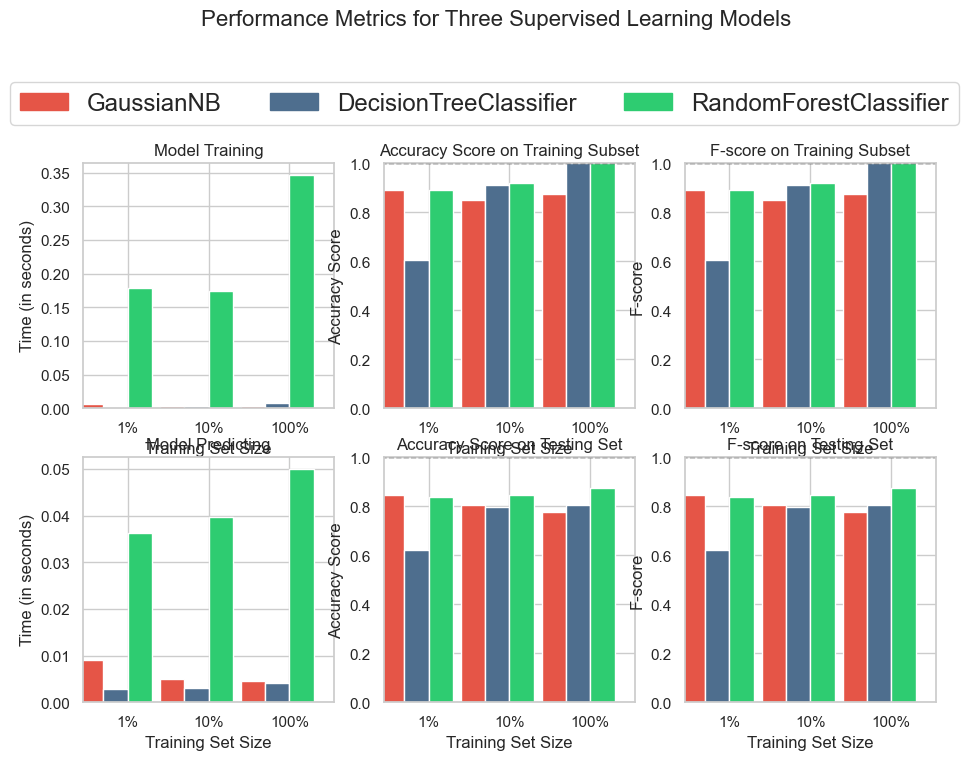

In [105]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)


# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100

samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)

#print(results) diccionarios de la iteracion de train_predict_evaluate

# Usamos el archivo visuals.py dentro que esta en nuestra carpeta principal
vs.visualize_classification_performance(results)

## Cual es el motivo del  bajo rendimiento del modelo GaussianNB en comparacion a los otros metodos?
##### Question: Why does Gaussian Naive Bayes perform poorly compared to the other methods?

Una tarea importante al realizar aprendizaje supervisado en un conjunto de datos como los datos del censo que estudiamos aquí es determinar qué características proporcionan la mayor capacidad predictiva. Al centrarnos en la relación entre solo algunas características cruciales y la etiqueta de destino, simplificamos nuestra comprensión del fenómeno, lo cual es casi siempre algo útil. En el caso de este proyecto, eso significa que deseamos identificar un pequeño número de características que predicen con mayor fuerza la calidad de los vinos.

Elige un clasificador de scikit-learn (por ejemplo, adaboost, random forests) que tenga un atributo feature_importance_, que es una función que clasifica la importancia de las características según el clasificador elegido. En la siguiente celda de Python, ajusta este clasificador al conjunto de entrenamiento y utiliza este atributo para determinar las 5 características más importantes para el conjunto de datos de vinos.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[0.07160551 0.1176949  0.0866742  0.05592862 0.08960149 0.06026404
 0.08903446 0.08770205 0.0713964  0.13049859 0.13959975]


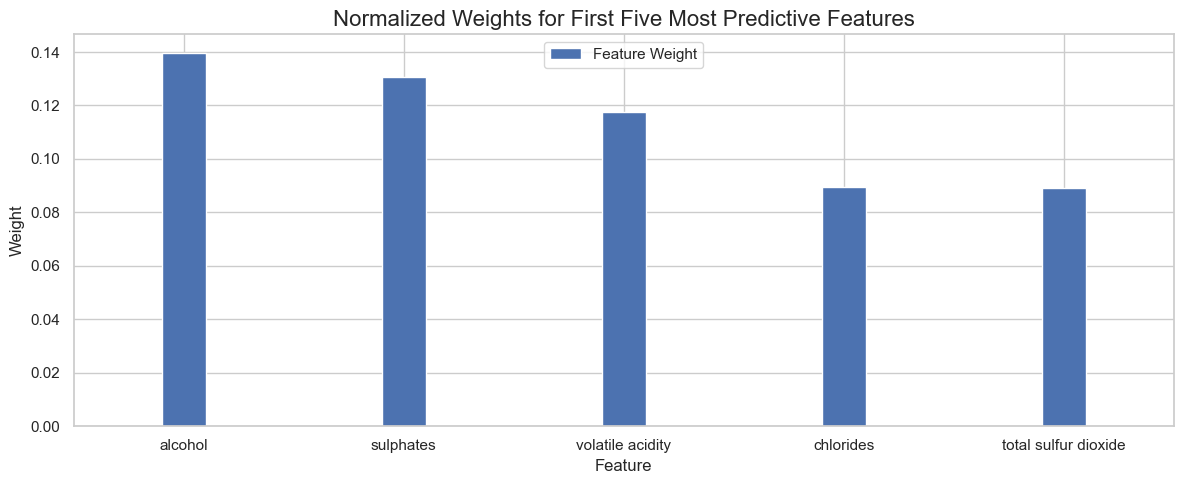

In [107]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

print(X_train.columns)
print(importances)

# Plot
vs.feature_plot(importances, X_train, y_train)

## Hyperparameter tuning using GridSearchCV:

In [110]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters or base_estimators list you wish to tune, using a dictionary if needed.
# Example: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

"""
n_estimators: Number of trees in the forest
max_features: The number of features to consider when looking for the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [10, 20, 30], 'max_features':[3,4,5, None], 'max_depth': [5,6,7, None]}


# En el contexto de ajuste de hiperparámetros, cuando se establece un parámetro en None
# se le da libertad al modelo para elegir el valor óptimo para ese parámetro durante el proceso de entrenamiento

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# TODO: Perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-after scores for an unoptimized model
print("Unoptimized model\n------")
print(f"Accuracy score on testing data: {accuracy_score(y_test, predictions):.4f}")
print(f"F-score on testing data: {fbeta_score(y_test, predictions, beta=0.5, average='micro'):.4f}")

# Report the results of the optimized model
print("\nOptimized Model\n------")
print(best_clf)
print("\nFinal accuracy score on the testing data: {accuracy_score(y_test, best_predictions):.4f}")
print(f"Final F-score on the testing data: {fbeta_score(y_test, best_predictions, beta=0.5, average='micro'):.4f}")

Unoptimized model
------
Accuracy score on testing data: 0.8712
F-score on testing data: 0.8712

Optimized Model
------
RandomForestClassifier(max_features=4, n_estimators=10)

Final accuracy score on the testing data: {accuracy_score(y_test, best_predictions):.4f}
Final F-score on the testing data: 0.8814


## Podemos evaluar nuestro modelo proporcionando diferentes inputs 
##### Finally, you can test out your model by giving it a bunch of inputs:

In [114]:
"""Brindamos inputs teniendo en cuenta el orden de las columnas: fixed acidity, volatile acidity, citric acid, 
residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol
"""

wine_data = [[8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9.5],
            [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 1 ],
            [7.4, 2, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 0.6]]
               
# Show predictions
for i, quality in enumerate(best_clf.predict(wine_data)):
    print("Predicted quality for Wine {} is: {}".format(i+1, quality))

Predicted quality for Wine 1 is: 1
Predicted quality for Wine 2 is: 1
Predicted quality for Wine 3 is: 1


/Users/lucasmorrone/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [121]:
redwines = pd.read_csv("data/winequality-red.csv", sep=';')

R60_records = redwines.head(160)

wine_data_p2 = R60_records[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

for i, quality in enumerate(best_clf.predict(wine_data_p2.values)):
    print("Predicted quality for Wine {} is: {}".format(i+1, quality))
    


# Recordemos que se imprimiran las etiquetas de quality definidas en la celda 41.
# Donde agrupamos las distintas calidades de vinos en valores de 0,1 y 2 
# Etiqueta de calidad: Se crea una lista de etiquetas de calidad,
# donde se asigna el valor 0 para vinos de baja calidad, 1 para vinos de calidad promedio
# 2 para vinos de alta calidad.


Predicted quality for Wine 1 is: 1
Predicted quality for Wine 2 is: 1
Predicted quality for Wine 3 is: 1
Predicted quality for Wine 4 is: 1
Predicted quality for Wine 5 is: 1
Predicted quality for Wine 6 is: 1
Predicted quality for Wine 7 is: 1
Predicted quality for Wine 8 is: 1
Predicted quality for Wine 9 is: 1
Predicted quality for Wine 10 is: 1
Predicted quality for Wine 11 is: 1
Predicted quality for Wine 12 is: 1
Predicted quality for Wine 13 is: 1
Predicted quality for Wine 14 is: 1
Predicted quality for Wine 15 is: 1
Predicted quality for Wine 16 is: 1
Predicted quality for Wine 17 is: 2
Predicted quality for Wine 18 is: 1
Predicted quality for Wine 19 is: 1
Predicted quality for Wine 20 is: 1
Predicted quality for Wine 21 is: 1
Predicted quality for Wine 22 is: 1
Predicted quality for Wine 23 is: 1
Predicted quality for Wine 24 is: 1
Predicted quality for Wine 25 is: 1
Predicted quality for Wine 26 is: 1
Predicted quality for Wine 27 is: 1
Predicted quality for Wine 28 is: 1
P

/Users/lucasmorrone/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
